# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [64]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

hd = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [65]:
hd['flag_doente'] = (hd['num'] != 0).astype('int64')
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [33]:
hdd = pd.crosstab(hd['sex'], hd['flag_doente'], margins = True)
hdd

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [10]:
hdd['media_doentes'] = hdd[1]/hdd['All']
hdd

flag_doente,0,1,All,media_doentes
sex,,,,
0.0,72,25,97,0.257732
1.0,92,114,206,0.553398
All,164,139,303,0.458746


In [11]:
hdd['chance'] = hdd[1]/hdd[0]
hdd

flag_doente,0,1,All,media_doentes,chance
sex,,,,,
0.0,72,25,97,0.257732,0.347222
1.0,92,114,206,0.553398,1.239130
All,164,139,303,0.458746,0.847561


In [15]:
0.34/1.23

0.2764227642276423

In [17]:
hdd.loc['All', 'chance']

0.8475609756097561

In [19]:
hdd['RC_vs_all'] = hdd['chance']/hdd.loc['All','chance']
hdd

flag_doente,0,1,All,media_doentes,chance,RC_vs_all
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672
1.0,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [77]:
np.log(0.2764227642276423)

-1.2858238307562562

In [78]:
np.log(0.8475609756097561)

-0.1653924946935067

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [113]:
hdds = pd.crosstab(hd['age'], hd['flag_doente'], margins=True)
hdds.head(5)

flag_doente,0,1,All
age,,,
29.0,1,0,1
34.0,2,0,2
35.0,2,2,4
37.0,2,0,2
38.0,1,1,2


In [126]:
pd.qcut(hd.age, 5).head(5)

0      (62.0, 77.0]
1      (62.0, 77.0]
2      (62.0, 77.0]
3    (28.999, 45.0]
4    (28.999, 45.0]
Name: age, dtype: category
Categories (5, interval[float64, right]): [(28.999, 45.0] < (45.0, 53.0] < (53.0, 58.0] < (58.0, 62.0] < (62.0, 77.0]]

In [115]:
hdds['age'] = pd.qcut(hd.age, 5)
hdds.head()

flag_doente,0,1,All,age
age,,,,
29.0,1,0,1,"(28.999, 45.0]"
34.0,2,0,2,"(28.999, 45.0]"
35.0,2,2,4,"(28.999, 45.0]"
37.0,2,0,2,"(53.0, 58.0]"
38.0,1,1,2,"(53.0, 58.0]"


In [122]:
hdds['idade_media'] = hdds[1]/hdds['All']
hdds.head()

flag_doente,0,1,All,age,idade_media,chance
age,,,,,,
29.0,1,0,1,"(28.999, 45.0]",0.0,0.0
34.0,2,0,2,"(28.999, 45.0]",0.0,0.0
35.0,2,2,4,"(28.999, 45.0]",0.5,1.0
37.0,2,0,2,"(53.0, 58.0]",0.0,0.0
38.0,1,1,2,"(53.0, 58.0]",0.5,1.0


In [119]:
hdds['chance'] = hdds[1]/hdds[0]
hdds.head()

flag_doente,0,1,All,age,idade_media,chance
age,,,,,,
29.0,1,0,1,"(28.999, 45.0]",0.0,0.0
34.0,2,0,2,"(28.999, 45.0]",0.0,0.0
35.0,2,2,4,"(28.999, 45.0]",0.5,1.0
37.0,2,0,2,"(53.0, 58.0]",0.0,0.0
38.0,1,1,2,"(53.0, 58.0]",0.5,1.0


In [123]:
hdds.loc['All', 'age']

nan

In [125]:
hdds['RC_vs_age'] = hdds['chance']/hdds.loc['All','age']
hdds.head()

flag_doente,0,1,All,age,idade_media,chance,RC_vs_age
age,,,,,,,
29.0,1,0,1,"(28.999, 45.0]",0.0,0.0,NaN
34.0,2,0,2,"(28.999, 45.0]",0.0,0.0,NaN
35.0,2,2,4,"(28.999, 45.0]",0.5,1.0,NaN
37.0,2,0,2,"(53.0, 58.0]",0.0,0.0,NaN
38.0,1,1,2,"(53.0, 58.0]",0.5,1.0,NaN


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<AxesSubplot:ylabel='flag_doente'>

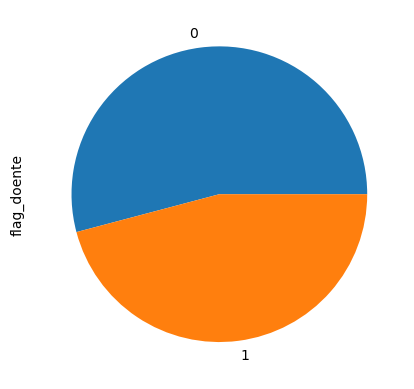

In [71]:
hd['flag_doente'].value_counts().plot.pie()

<AxesSubplot:xlabel='sex', ylabel='count'>

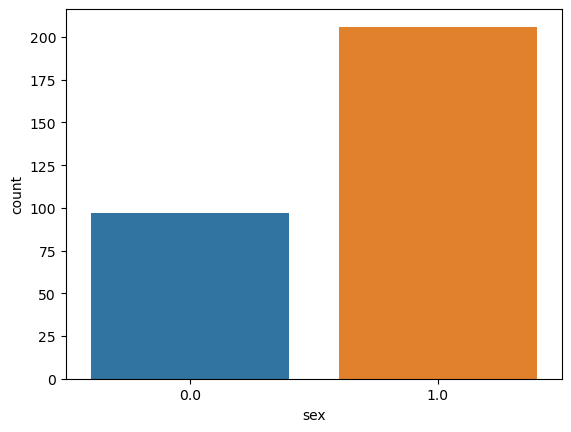

In [73]:
sns.countplot(x='sex', data=hd)